In [15]:
# Tirar metricas estatisticas da base de Febre Amarela

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/1%20-%20Data%20Clean/yellow_fever_clean.csv'

In [18]:
dados = pd.read_csv(url, index_col= False)
dados.head()

,ID,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DIA_IS
0,2,N,RR,PACARAIMA,M,19,8,2,1995,1994/1995,NÃO,19
1,3,NE,MA,AMARANTE DO MARANHÃO,M,32,13,4,1995,1994/1995,IGN,1
2,4,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,1994/1995,SIM,3
3,5,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,1994/1995,SIM,12
4,6,N,AM,TAPAUÁ,M,29,4,1,1996,1995/1996,SIM,26


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                2734 non-null   int64 
 1   MACRORREG_LPI     2734 non-null   object
 2   UF_LPI            2734 non-null   object
 3   MUN_LPI           2734 non-null   object
 4   SEXO              2734 non-null   object
 5   IDADE             2734 non-null   int64 
 6   SE_IS             2734 non-null   int64 
 7   MES_IS            2734 non-null   int64 
 8   ANO_IS            2734 non-null   int64 
 9   MONITORAMENTO_IS  2734 non-null   object
 10  OBITO             2734 non-null   object
 11  DIA_IS            2734 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 256.4+ KB


Deaths/Óbitos

In [20]:
import seaborn as sns

<Axes: xlabel='OBITO', ylabel='count'>

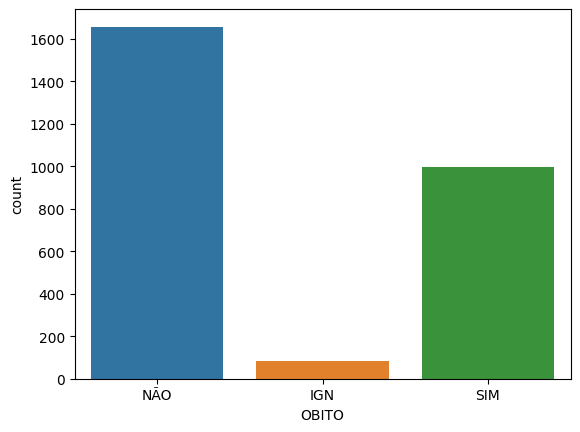

In [21]:
sns.countplot(x = 'OBITO', data = dados)

In [22]:
rows = dados['OBITO'] != 'IGN'

In [23]:
dados = dados[rows].reset_index()

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             2652 non-null   int64 
 1   ID                2652 non-null   int64 
 2   MACRORREG_LPI     2652 non-null   object
 3   UF_LPI            2652 non-null   object
 4   MUN_LPI           2652 non-null   object
 5   SEXO              2652 non-null   object
 6   IDADE             2652 non-null   int64 
 7   SE_IS             2652 non-null   int64 
 8   MES_IS            2652 non-null   int64 
 9   ANO_IS            2652 non-null   int64 
 10  MONITORAMENTO_IS  2652 non-null   object
 11  OBITO             2652 non-null   object
 12  DIA_IS            2652 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 269.5+ KB


<Axes: xlabel='OBITO', ylabel='count'>

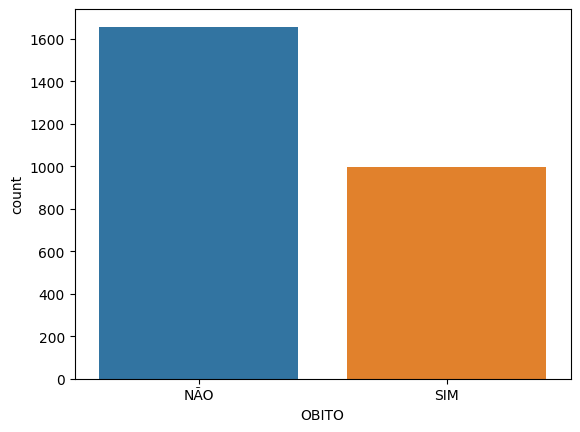

In [25]:
sns.countplot(x = 'OBITO', data = dados)

<Axes: xlabel='SEXO', ylabel='count'>

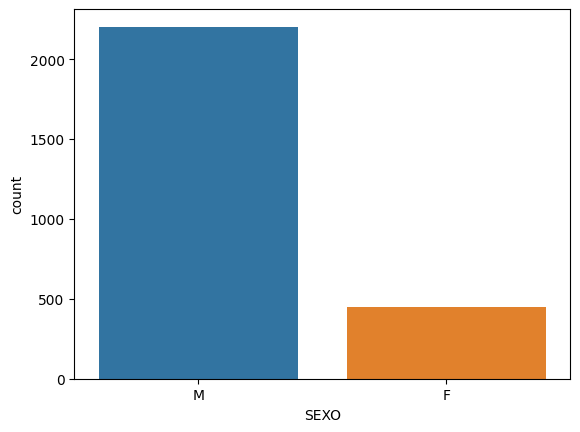

In [26]:
sns.countplot(x = 'SEXO' , data = dados)

<Axes: >

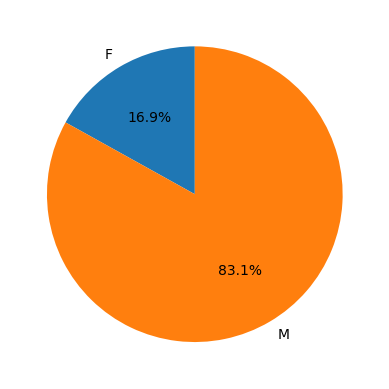

In [48]:
contagem = dados.groupby(['SEXO']).size()

fig, ax = plt.subplots()
contagem.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)

Text(0, 0.5, 'Count/Contagem')

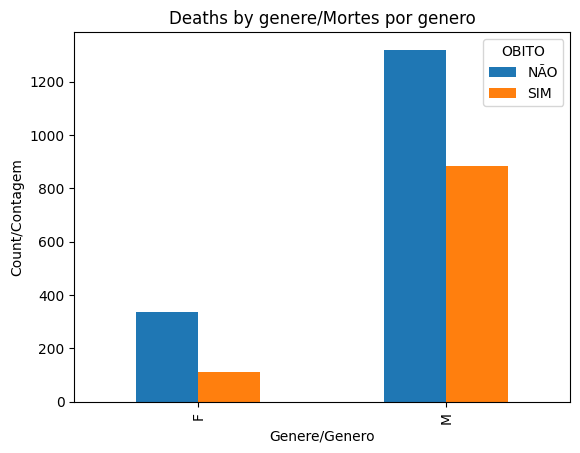

In [27]:
contagem = dados.groupby(['SEXO','OBITO']).size().unstack(fill_value = 0)

contagem.plot(kind='bar')

plt.title('Deaths by genere/Mortes por genero')
plt.xlabel('Genere/Genero')
plt.ylabel('Count/Contagem')

Temporal Analysis/Análise temporal

Text(0.5, 1.0, 'Cases by years / Casos por anos')

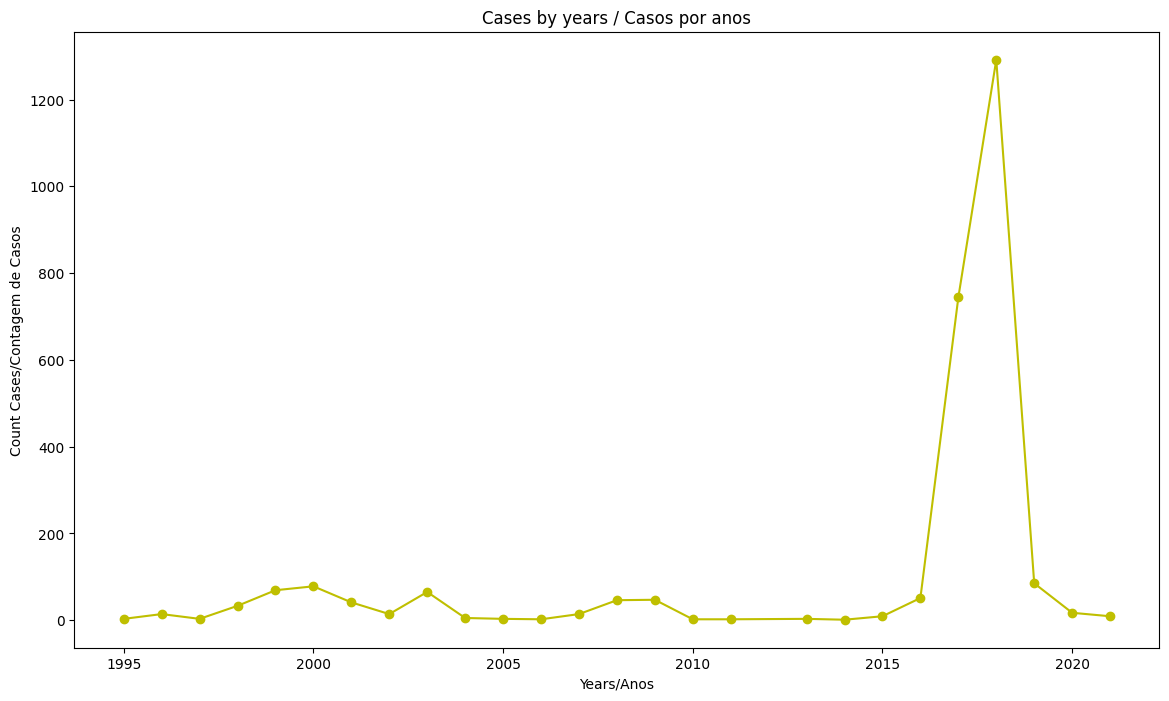

In [28]:
plt.figure(figsize = (14,8))
plt.plot(dados['ANO_IS'].value_counts().sort_index().index
         , dados['ANO_IS'].value_counts().sort_index().values
         , marker='o'
         , linestyle='-'
         , color='y'
         , label='Contagem por Ano')

plt.xlabel('Years/Anos')
plt.ylabel('Count Cases/Contagem de Casos')
plt.title('Cases by years / Casos por anos')

Text(0, 0.5, 'Count/Contagem')

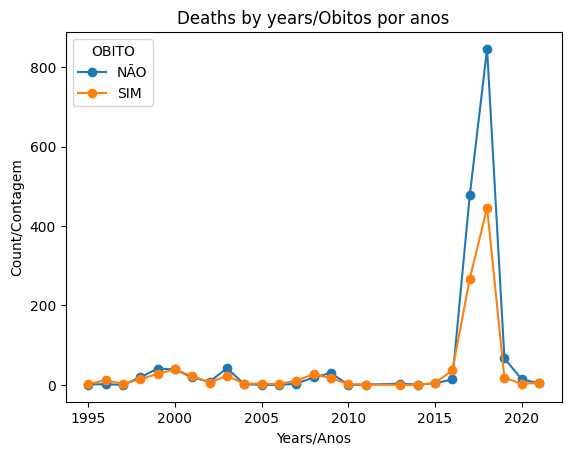

In [42]:
dados_agrupados = dados.groupby(['ANO_IS','OBITO']).size().unstack(fill_value = 0)

dados_agrupados.plot(kind = 'line', marker = 'o')
plt.title('Deaths by years/Obitos por anos')
plt.xlabel('Years/Anos')
plt.ylabel('Count/Contagem')

Text(0.5, 1.0, 'Cases by months/Casos por mês')

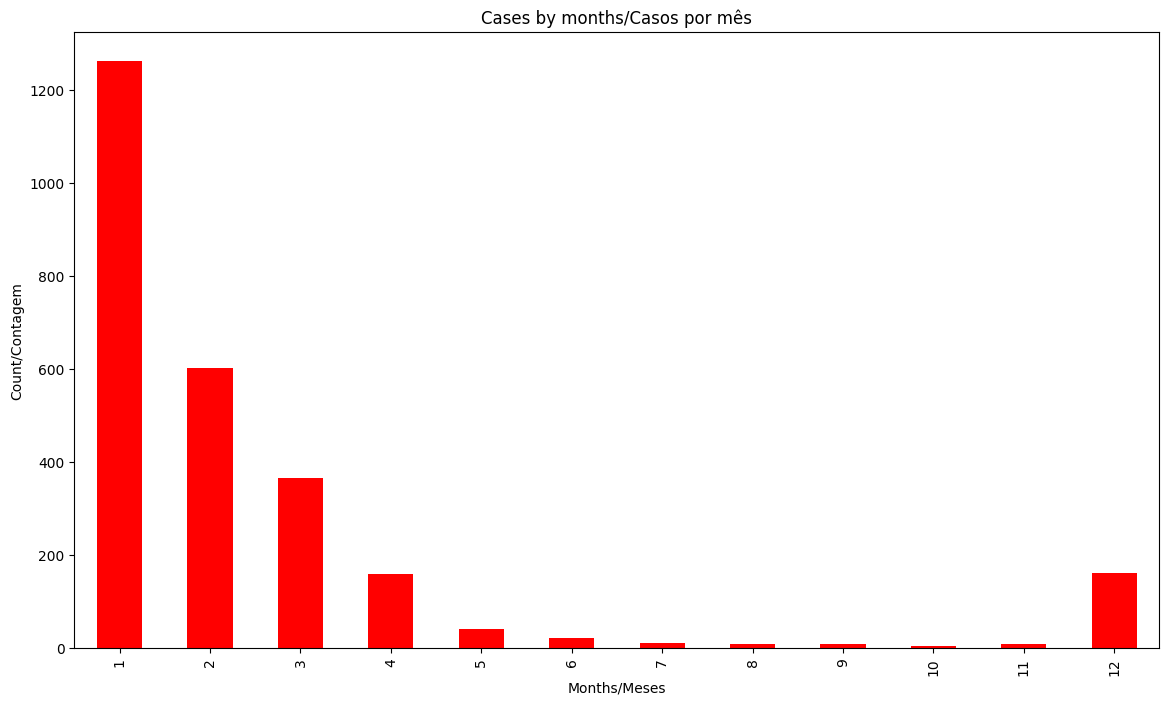

In [29]:
plt.figure(figsize = (14,8))
dados['MES_IS'].value_counts().sort_index().plot(kind='bar', color = 'red')

plt.xlabel('Months/Meses')
plt.ylabel('Count/Contagem')
plt.title('Cases by months/Casos por mês')

Analysis by States/ Análise por Estados

<Axes: >

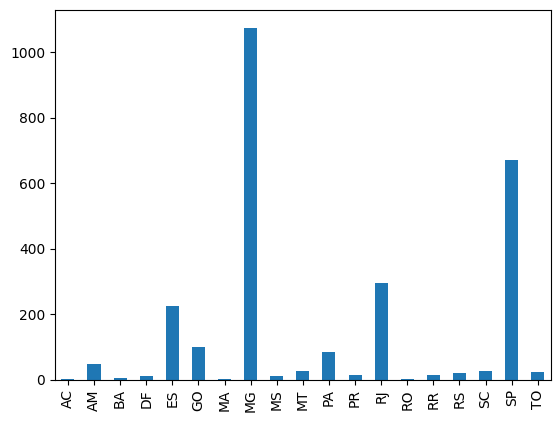

In [30]:
dados['UF_LPI'].value_counts().sort_index().plot(kind = 'bar')

Text(0, 0.5, 'Deaths/Obitos')

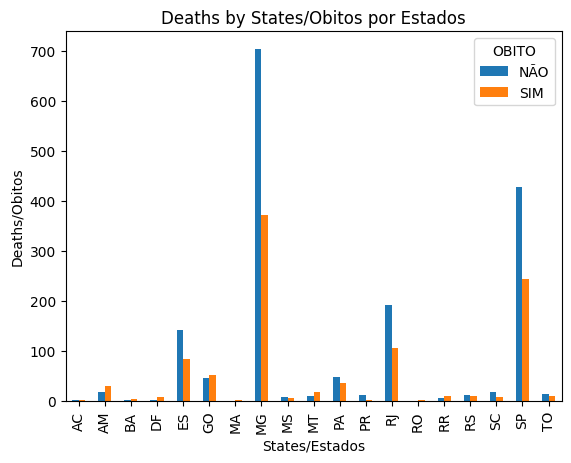

In [31]:
contagem = dados.groupby(['UF_LPI', 'OBITO']).size().unstack(fill_value=0)

contagem.plot(kind='bar')

plt.title('Deaths by States/Obitos por Estados')
plt.xlabel('States/Estados')
plt.ylabel('Deaths/Obitos')